In [43]:
# set up working catalog
import sys
from pathlib import Path
project_path = str(Path().cwd().parent.parent.resolve())
if project_path not in sys.path:
    sys.path.append(project_path)

# imports
from common.utils import get_data, get_datasets, train_with_plot, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [44]:
datasets = get_datasets()

In [45]:
pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)), 
    ("clf", LogisticRegression())
])

param_grid = [
    {
        "poly__degree": [1, 2],
        "clf__penalty": ["l1"],
        "clf__C": [0.1, 1],
        "clf__solver": ["liblinear"],
        "clf__max_iter": [40, 100, 200]
    },
    {
        "poly__degree": [1, 2],
        "clf__penalty": [None, "l2"],
        "clf__C": [0.1, 1],
        "clf__solver": ["lbfgs"],
        "clf__max_iter": [40, 100, 200]
    }
]

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

for dataset in datasets:
    grid.fit(dataset[X_TRAIN], dataset[Y_TRAIN])
    
    print(f"Best params: {grid.best_params_}")
    print(f"Train accuracy: {grid.score(dataset[X_TRAIN], dataset[Y_TRAIN])}")
    print(f"Test accuracy: {grid.score(dataset[X_TEST], dataset[Y_TEST])}")
    print()
    

Best params: {'clf__C': 0.1, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'poly__degree': 1}
Train accuracy: 0.7962021024075958
Test accuracy: 0.7857627118644068

Best params: {'clf__C': 1, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'poly__degree': 1}
Train accuracy: 0.818243472363513
Test accuracy: 0.7627118644067796

Best params: {'clf__C': 0.1, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'poly__degree': 1}
Train accuracy: 0.8
Test accuracy: 0.7686567164179104



In [46]:
data = get_data()
X = data.drop(columns=["Target"])
y = data["Target"]

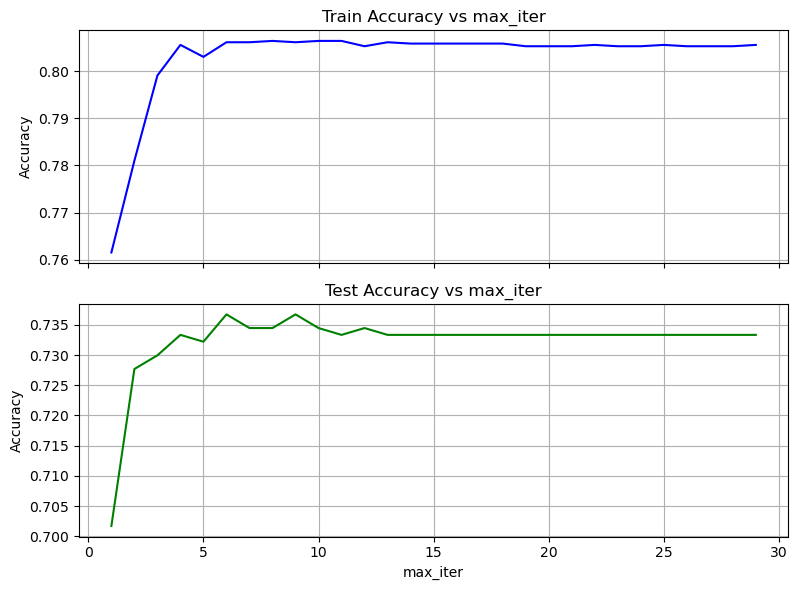

In [47]:
import warnings
warnings.filterwarnings("ignore")

train_with_plot(
    model = lambda max_iter: LogisticRegression(max_iter=max_iter, penalty="l1", solver="liblinear", C=1), 
    X=X, 
    y=y,
    start=1,
    step=1,
    end=30
)

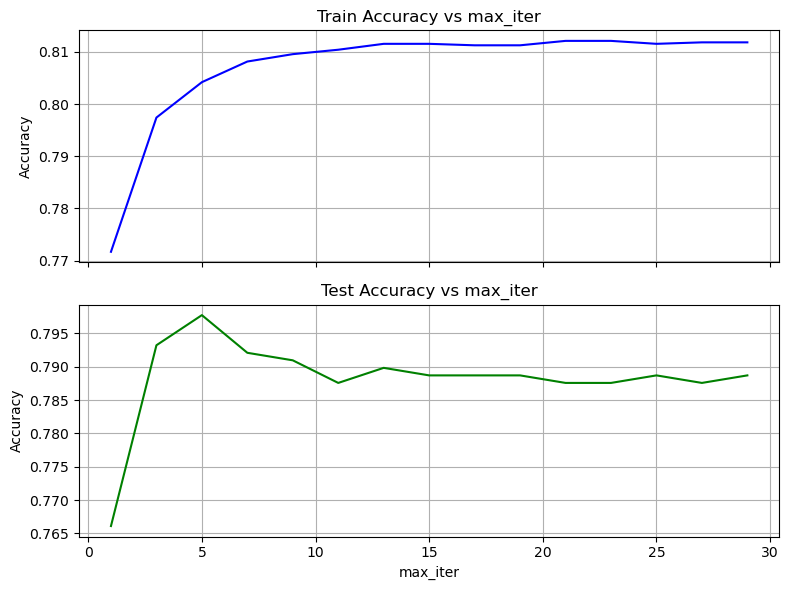

In [48]:
train_with_plot(
    model = lambda max_iter: LogisticRegression(max_iter=max_iter, penalty="l1", solver="liblinear", C=1), 
    X=X, 
    y=y,
    degree=2,
    start=1,
    step=2,
    end=30
)

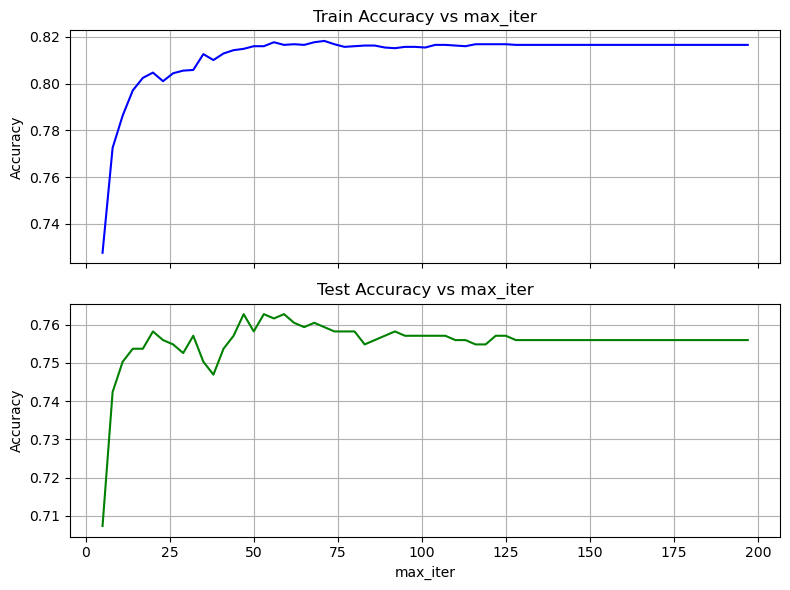

In [49]:
train_with_plot(
    model = lambda max_iter: LogisticRegression(max_iter=max_iter, penalty="l2", solver="lbfgs", C=1), 
    X=X, 
    y=y,
    start=5,
    step=3,
    end=200
)

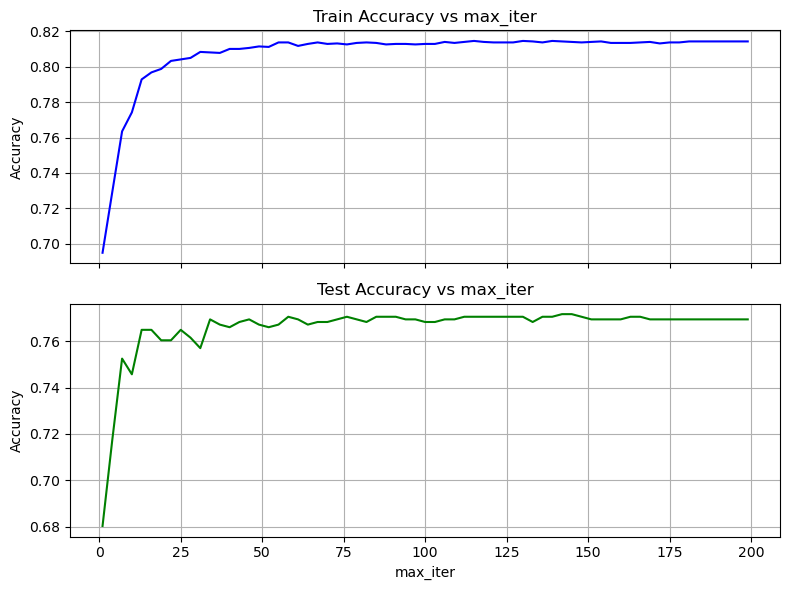

In [50]:
train_with_plot(
    model = lambda max_iter: LogisticRegression(max_iter=max_iter, penalty="l2", solver="lbfgs", C=0.1), 
    X=X, 
    y=y,
    degree=2,
    start=1,
    step=3,
    end=200
)